In [14]:
import pytensor
import pytensor.tensor as pt
import matplotlib.pyplot as plt
import numpy as np
import sys

sys.path.append("../..")
from cge_modeling.pytensorf.compile import euler_approximation, make_jacobian

# Non-Linear Test Function

In [15]:
x = pt.dscalar("x")
y = pt.dscalar("y")
eq = pt.atleast_1d(y - pt.cos(x))
n_steps = pt.iscalar("n_steps")

x0_final, result = euler_approximation(eq, [y], [x], n_steps=n_steps)
f = pytensor.function([x, y, x0_final, n_steps], result)

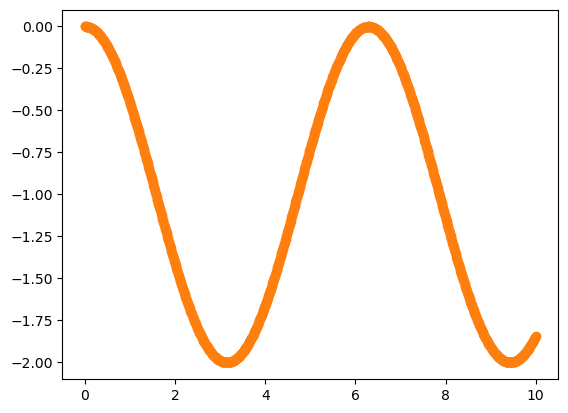

In [18]:
fig, ax = plt.subplots()
x_grid = np.linspace(0, 10, 100)
ax.plot(x_grid, np.cos(x_grid) - 1)

y_values, x_values = f(0, 0, np.array([10.0]), 1000)
plt.plot(x_values, y_values, marker="o")

# Non-Differentiable Test Function

In [19]:
x = pt.dscalar("x")
y = pt.dscalar("y")
eq = pt.atleast_1d(y - pt.maximum(0, pt.cos(x)) * pt.cos(x))
n_steps = pt.iscalar("n_steps")

x0_final, result = euler_approximation(eq, [y], [x], n_steps=n_steps)
f = pytensor.function([y, x, x0_final, n_steps], result)

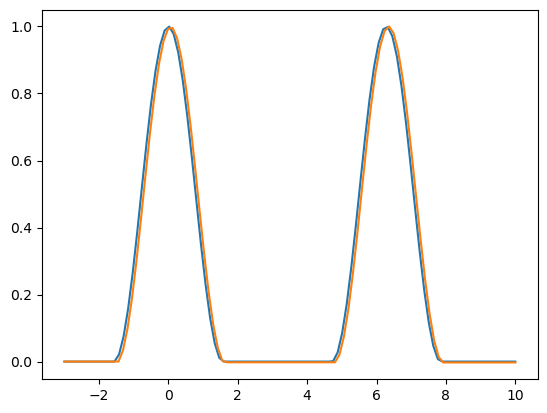

In [22]:
def f_test(x):
    return np.maximum(0, np.cos(x)) * np.cos(x)


fig, ax = plt.subplots()
x_grid = np.linspace(-3, 10, 100)
ax.plot(x_grid, f_test(x_grid))

y_values, x_values = f(0, -3, np.array([10.0]), 100)
plt.plot(x_values, y_values)

# 2-Dimensional Problem

$$\begin{align} y_1 &= v_1 ^ 2 v_3 - 1 \\
                y_2 &= v_1 + v_2 - 2 \end{align}$$
                
With analytic solutions $v_1 = 1 / \sqrt{v3}$ and $v_2 = 2 - v_1$

In [24]:
variables = v1, v2 = [pt.dscalar(name) for name in ["v1", "v2"]]
parameters = v3 = pt.dscalar("v3")
n_steps = pt.iscalar("n_steps")
inputs = variables + [parameters]

equations = pt.stack([v1**2 * v3 - 1, v1 + v2 - 2])

In [25]:
theta_final, result = euler_approximation(equations, variables, [parameters], n_steps=n_steps)
f = pytensor.function(inputs + [theta_final, n_steps], result)

In [26]:
def f_analytic(v3):
    v1 = 1 / np.sqrt(v3)
    v2 = 2 - v1
    return np.array([v1, v2])

In [27]:
initial_point = [1, 1]
v3_initial = 1
v3_final = 2

analytic_solution = np.array(f_analytic(v3_final))

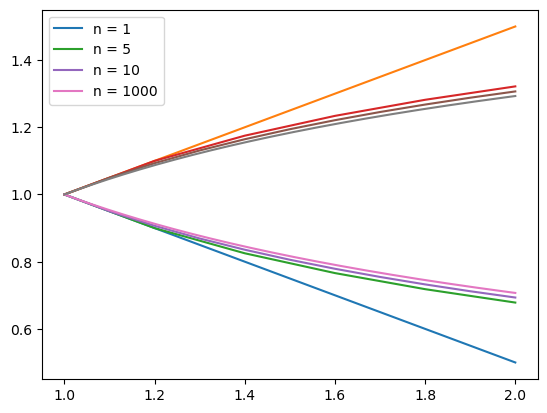

In [28]:
fig, ax = plt.subplots()
for n in [1, 5, 10, 1000]:
    *x, theta = f(1.0, 1.0, 1.0, np.array([2.0]), n)
    for i, x_vals in enumerate(x):
        ax.plot(theta.ravel(), x_vals, label=f"n = {n}" if i == 0 else None)
ax.legend()